In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image, ImageChops
import copy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def get_img(path):
  test_img = Image.open(path)
  test_img = test_img.resize((24, 24))
  plt.subplot(1,6,i)
  plt.imshow(test_img)
  test_x = np.array(test_img, np.float32)
  test_x = test_x / 255.0
  print(test_x.shape)
  return test_x

(24, 24, 3)
(24, 24, 3)
(24, 24, 3)
(24, 24, 3)


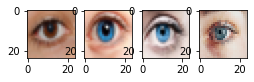

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

path = '/content/drive/My Drive/Glaza/'
for i in range(1, 5):
  x_train.append(get_img(path + str(i) +'.png'))
  y_train.append(0)

(24, 24, 3)
(24, 24, 3)


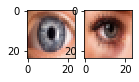

In [ ]:
path = '/content/drive/My Drive/Glaza/'
for i in range(5, 7):
  x_test.append(get_img(path + str(i) +'.png'))
  y_test.append(0)

(24, 24, 3)
(24, 24, 3)
(24, 24, 3)
(24, 24, 3)


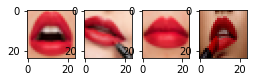

In [ ]:
path = '/content/drive/My Drive/Lips/'
for i in range(1, 5):
  x_train.append(get_img(path + str(i) +'.png'))
  y_train.append(1)

(24, 24, 3)
(24, 24, 3)


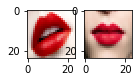

In [ ]:
path = '/content/drive/My Drive/Lips/'
for i in range(5, 7):
  x_test.append(get_img(path + str(i) +'.png'))
  y_test.append(1)

(24, 24, 3)
(24, 24, 3)
(24, 24, 3)
(24, 24, 3)


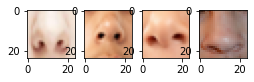

In [ ]:
path = '/content/drive/My Drive/Nose/'
for i in range(1, 5):
  x_train.append(get_img(path + str(i) +'.png'))
  y_train.append(2)

(24, 24, 3)
(24, 24, 3)


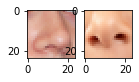

In [ ]:
path = '/content/drive/My Drive/Nose/'
for i in range(5, 7):
  x_test.append(get_img(path + str(i) +'.png'))
  y_test.append(2)

In [ ]:
x_tr = []
x_tst = []

for i in range(len(x_train)):
  x = []
  for j in range(len(x_train[0])):
    for k in range(len(x_train[0][0])):
      x.extend(1 - x_train[i][j][k][:3])
  x_tr.append(x)

for i in range(len(x_test)):
  x = []
  for j in range(len(x_test[0])):
    for k in range(len(x_test[0][0])):
      x.extend(1 - x_test[i][j][k][:3])
  x_tst.append(x)

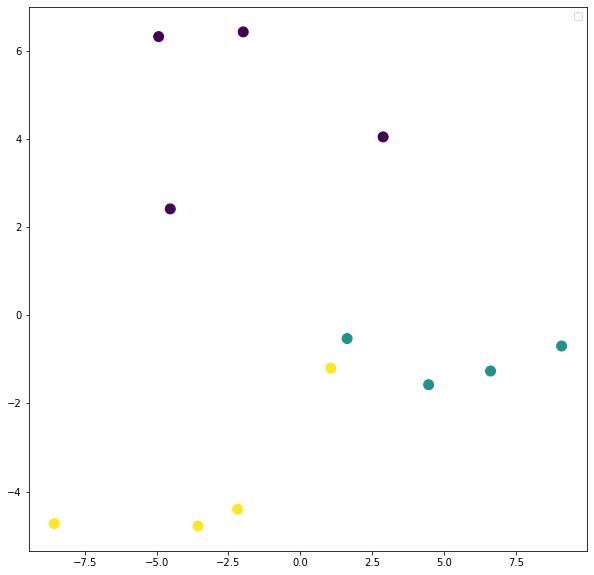

In [ ]:
plt.figure(figsize=(10,10))
pca = PCA(n_components=2)
pca_reduce = pca.fit_transform(x_tr)

pca_x1 = pca_reduce[:, 0]
pca_x2 = pca_reduce[:, 1]

plt.scatter(pca_x1, pca_x2, s = 100, c = y_train, alpha = 5)
plt.legend()
plt.show()

In [ ]:
def y_to_arrays(y_t):
  y_arrays = []
  for y in y_t:
    y_arr = np.zeros(np.array(y_t).max() + 1, dtype = int)
    y_arr = y_arr.tolist()
    y_arr[y] = 1
    y_arrays.append(y_arr)
  return y_arrays

def arrays_to_y(y_arrays):
  y_t = []
  for y in y_arrays:
    y_t.append(np.argmax(y))
  return y_t

In [ ]:
def fun_sigmoid(s):
  return 1 / (1 + np.exp(-s))

def fun_der_sigm(s):
  return fun_sigmoid(s) * (1 - fun_sigmoid(s))

def err_acc(pred_y, tst_y, eps):
  hit = 0
  for i in range(len(tst_y)):
    if(np.abs(pred_y[i] - tst_y[i]) < eps): hit = hit + 1
  return hit / len(tst_y)

class Neuron:
  def __init__(self, weightsCount, number = None):
    if number is None: 
      self.weights = []
      for i in range(weightsCount):
        self.weights.append(random.randint(-3, 3))
    else:
      self.weights = [] 
      for i in range(weightsCount):
        self.weights.append(number)

  def get_sum(self, x):
    sum = 0
    for i in range(len(self.weights)):
      sum += self.weights[i] * x[i]
    return sum

  def feed(self, x):
    y = fun_sigmoid(self.get_sum(x))
    return y

  def print_params(self):
    n_str = ''
    for i in range(len(self.weights)):
      n_str += str(self.weights[i]) + " "
    print(n_str + str(self.bias))

In [ ]:
def err_los_mc(tst_y, pred_y):
  loss = 0
  for i in range(len(tst_y)):
    for j in range(len(tst_y[0])):
      loss += np.square(pred_y[i][j] - tst_y[i][j])
  loss = np.sqrt(loss) / len(tst_y)
  return loss

def add_bias_to_data(data):
  data_with_bias = copy.deepcopy(data)
  for elem in data_with_bias:
    elem.append(1)
  return data_with_bias

In [ ]:
class NetworkMC:
  def __init__(self, x_count, l1_count, l2_count, l3_count, y_count):
    self.NeuronsL1 = []
    self.NeuronsL2 = []
    self.NeuronsL3 = []
    self.out_layer = []
    for i in range(l1_count):
      n = Neuron(x_count + 1)
      self.NeuronsL1.append(n)
    for i in range(l2_count):
      n = Neuron(l1_count + 1)
      self.NeuronsL2.append(n)
    for i in range(l3_count):
      n = Neuron(l2_count + 1)
      self.NeuronsL3.append(n)
    for i in range(y_count):
      n = Neuron(l3_count + 1)
      self.out_layer.append(n)

  def predict(self, data):
    data_with_bias = add_bias_to_data(data)
    y_pred = []
    for x in data_with_bias:
      y = []
      res1 = []
      for n in self.NeuronsL1:
        res1.append(n.feed(x))
      res1.append(1)
      res2 = []
      for n in self.NeuronsL2:
        res2.append(n.feed(res1))
      res2.append(1)
      res3 = []
      for n in self.NeuronsL3:
        res3.append(n.feed(res2))
      res3.append(1)
      for n in self.out_layer:
        y.append(n.feed(res3))
      y_pred.append(y)
    return y_pred

  def train_grad_full_batch(self, data, y_trues, speed, epochs):
    data_with_bias = add_bias_to_data(data)
    y_trues_arr = y_to_arrays(y_trues) 
    errs = []
    epchs = []
    for epoch in range(epochs):
      for x, y_true in zip(data_with_bias, y_trues_arr):
        self.grad_iteration(x, y_true, speed)
      if epoch % (epochs // 20) == 0 or epoch == 0:
        y_preds = self.predict(data)
        err = err_los_mc(y_trues_arr, y_preds)
        acc = err_acc(y_trues, arrays_to_y(y_preds), 0.1)
        epchs.append(epoch)
        errs.append(err)
        print("Epoch %d err: %.3f" % (epoch, err))
        print("Epoch %d acc: %.3f" % (epoch, acc))
        if acc > 0.95 and err < 0.1:
          break
    return epchs, errs

  def train_grad_stochastic(self, data, y_trues, speed, epochs):
    data_with_bias = add_bias_to_data(data)
    y_trues_arr = y_to_arrays(y_trues) 
    errs = []
    epchs = []
    for epoch in range(epochs + 1):
      if epoch % (epochs // 20) == 0 or epoch == 0:
        y_preds = self.predict(data)
        err = err_los_mc(y_trues_arr, y_preds)
        epchs.append(epoch)
        errs.append(err)
        acc = err_acc(y_trues, arrays_to_y(y_preds), 0.1)
        print("Epoch %d err: %.3f" % (epoch, err))
        print("Epoch %d acc: %.3f" % (epoch, acc))
        if acc > 0.95 and err < 0.1:
          break
      n_rule = np.random.randint(0, len(data_with_bias))
      x = data_with_bias[n_rule]
      y_true = y_trues_arr[n_rule]
      self.grad_iteration(x, y_true, speed)
    return epchs, errs
  
  def grad_iteration(self, x, y_true, speed):
    res1 = []
    for n in self.NeuronsL1:
      res1.append(n.feed(x))
    res1.append(1)
    res2 = []
    for n in self.NeuronsL2:
      res2.append(n.feed(res1))
    res2.append(1)
    res3 = []
    for n in self.NeuronsL3:
      res3.append(n.feed(res2))
    res3.append(1)
    out = []
    for n in self.out_layer:
      out.append(n.feed(res3))
    
    grad = []
    for j in range(len(out)):
      delta = out[j] - y_true[j]
      grad.append(delta * fun_der_sigm(out[j]))
      for i in range(len(res3)):
        self.out_layer[j].weights[i] = self.out_layer[j].weights[i] - speed * grad[j] * res3[i]
    
    grad2 = []
    for i in range(len(res3)):
      grad_sum = 0
      for j in range(len(self.out_layer)):
        grad_sum += grad[j] * self.out_layer[j].weights[i] * fun_der_sigm(res3[i])
      grad2.append(grad_sum)
    for i in range(len(self.NeuronsL3)):
      for j in range(len(res2)):
        self.NeuronsL3[i].weights[j] = self.NeuronsL3[i].weights[j] - speed * grad2[i] * res2[j]

    grad3 = []
    for i in range(len(res2)):
      grad_sum = 0
      for j in range(len(self.NeuronsL3)):
        grad_sum += grad2[j] * self.NeuronsL3[j].weights[i] * fun_der_sigm(res2[i])
      grad3.append(grad_sum)
    for i in range(len(self.NeuronsL2)):
      for j in range(len(res1)):
        self.NeuronsL2[i].weights[j] = self.NeuronsL2[i].weights[j] - speed * grad3[i] * res1[j]

    grad4 = []
    for i in range(len(res1)):
      grad_sum = 0
      for j in range(len(self.NeuronsL2)):
        grad_sum += grad3[j] * self.NeuronsL2[j].weights[i] * fun_der_sigm(res1[i])
      grad4.append(grad_sum)
    for i in range(len(self.NeuronsL1)):
      for j in range(len(x)):
        self.NeuronsL1[i].weights[j] = self.NeuronsL1[i].weights[j] - speed * grad4[i] * x[j]

In [ ]:
network = NetworkMC(2, 16, 8, 4, 2)
x_xor = [[0,0], [0,1], [1,0], [1,1]]
y_xor = [0, 1, 1, 0]
epochs, errors = network.train_grad_full_batch(x_xor, y_xor, 0.015, 5000)

Epoch 0 err: 0.372
Epoch 0 acc: 0.500
Epoch 250 err: 0.361
Epoch 250 acc: 0.250
Epoch 500 err: 0.354
Epoch 500 acc: 0.500
Epoch 750 err: 0.346
Epoch 750 acc: 1.000
Epoch 1000 err: 0.338
Epoch 1000 acc: 1.000
Epoch 1250 err: 0.328
Epoch 1250 acc: 1.000
Epoch 1500 err: 0.316
Epoch 1500 acc: 1.000
Epoch 1750 err: 0.302
Epoch 1750 acc: 1.000
Epoch 2000 err: 0.284
Epoch 2000 acc: 1.000
Epoch 2250 err: 0.262
Epoch 2250 acc: 1.000
Epoch 2500 err: 0.237
Epoch 2500 acc: 1.000
Epoch 2750 err: 0.212
Epoch 2750 acc: 1.000
Epoch 3000 err: 0.188
Epoch 3000 acc: 1.000
Epoch 3250 err: 0.164
Epoch 3250 acc: 1.000
Epoch 3500 err: 0.140
Epoch 3500 acc: 1.000
Epoch 3750 err: 0.118
Epoch 3750 acc: 1.000
Epoch 4000 err: 0.102
Epoch 4000 acc: 1.000
Epoch 4250 err: 0.091
Epoch 4250 acc: 1.000
Epoch 4500 err: 0.083
Epoch 4500 acc: 1.000
Epoch 4750 err: 0.076
Epoch 4750 acc: 1.000


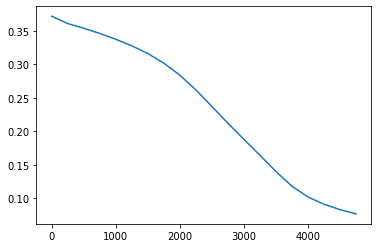

In [ ]:
plt.plot(epochs, errors)
plt.show()

In [ ]:
start_time = time.time()
network = NetworkMC(1728, 20, 10, 5, 3)
epochs, errors = network.train_grad_full_batch(x_tr, y_train, 0.02, 500)
print("time of training: " + str(time.time() - start_time) + " seconds")

Epoch 0 err: 0.263
Epoch 0 acc: 0.417
Epoch 25 err: 0.229
Epoch 25 acc: 0.333
Epoch 50 err: 0.200
Epoch 50 acc: 0.750
Epoch 75 err: 0.190
Epoch 75 acc: 0.750
Epoch 100 err: 0.168
Epoch 100 acc: 0.917
Epoch 125 err: 0.164
Epoch 125 acc: 1.000
Epoch 150 err: 0.174
Epoch 150 acc: 0.833
Epoch 175 err: 0.153
Epoch 175 acc: 0.917
Epoch 200 err: 0.166
Epoch 200 acc: 0.750
Epoch 225 err: 0.154
Epoch 225 acc: 0.917
Epoch 250 err: 0.138
Epoch 250 acc: 0.917
Epoch 275 err: 0.126
Epoch 275 acc: 1.000
Epoch 300 err: 0.129
Epoch 300 acc: 1.000
Epoch 325 err: 0.124
Epoch 325 acc: 1.000
Epoch 350 err: 0.117
Epoch 350 acc: 1.000
Epoch 375 err: 0.112
Epoch 375 acc: 1.000
Epoch 400 err: 0.109
Epoch 400 acc: 1.000
Epoch 425 err: 0.126
Epoch 425 acc: 1.000


<ipython-input-21-e171b8416fc6>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


Epoch 450 err: 0.134
Epoch 450 acc: 0.917
Epoch 475 err: 0.133
Epoch 475 acc: 0.917
time of training: 153.6180727481842 seconds


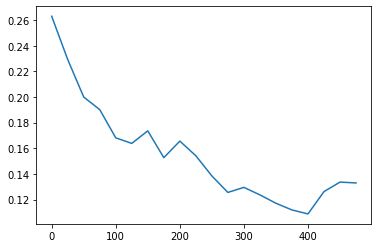

In [ ]:
plt.plot(epochs, errors)
plt.show()

In [ ]:
def get_res(y):
  if y > 0.5:
    return 1
  return 0

def get_res_multy(y):
  return np.argmax(y)

<ipython-input-21-e171b8416fc6>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-s))


[[0.7420205178794972, 0.2941905073806905, 0.013220051458699408], [0.7509183070590587, 0.40973818692115904, 0.011087143194570393], [0.7610649600176846, 0.4064279754117005, 0.011394736698210955], [0.08673608960158406, 0.7892207101119078, 0.2152726238294944], [0.21324636637580743, 0.03722750056600003, 0.4685032598858032], [0.0021369874034608163, 0.12411546324313355, 0.8043045205245842]]
acc:0.8333333333333334


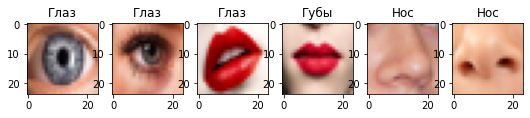

In [ ]:
y_pred = network.predict(x_tst)
y_pred_classes = []
print(y_pred)
for i in range(len(y_pred)):
  y_pred_classes.append(get_res_multy(y_pred[i]))
acc = err_acc(y_test, y_pred_classes, 0.1)
print("acc:" + str(acc))
ress = ['Глаз', 'Губы', 'Нос']
plt.figure(figsize=(15,5))
for i in range(6):
  plt.subplot(1, 10, i + 1)
  plt.title(ress[get_res_multy(y_pred[i])])
  plt.imshow(x_test[i])